# Welcome to the DCOM 2023 How Models Learn Hands On Challenge

<img src="dcom23back.jpg" width="800" height="600">

The business problem is to help the fictitious ***Boston DCom Real State Agency*** to be able to provide reliable price estimation for houses in the Boston area, analysing the factors that influence the pricing of properties. 

For that, we will use the "Boston Housing Data", a dataset that has been widely used for educational purposes: it is not intended to reflect any current state of the real state market. The the data columns (features) are the following: 

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars 
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1k dollars's

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (MEDV). 

Therefore your task problem consists in: given the set of features above describing a Boston neighbourhood, your machine learning model must predict the median house price in that area. Since the model will predict a continous value (not a discrete, ordinal value or a category),  this a **regression** task.

In this hands on exercise you will first create a simple model using just the RM column to predict the prices. After looking at some criteria and metrics to assess the model, we will use some basic techniques to create a more robust model, now including further features. Finally, you will be challenged to research an alternative model to achieve higher performance, and deliver a more accurate model to the Boston DCom Real State Agency.

The learning objectives are  are:

- Understand simple and essential data preparation steps, such as scaling features
- Perform variable correlation analysis 
- Assess model performance critically

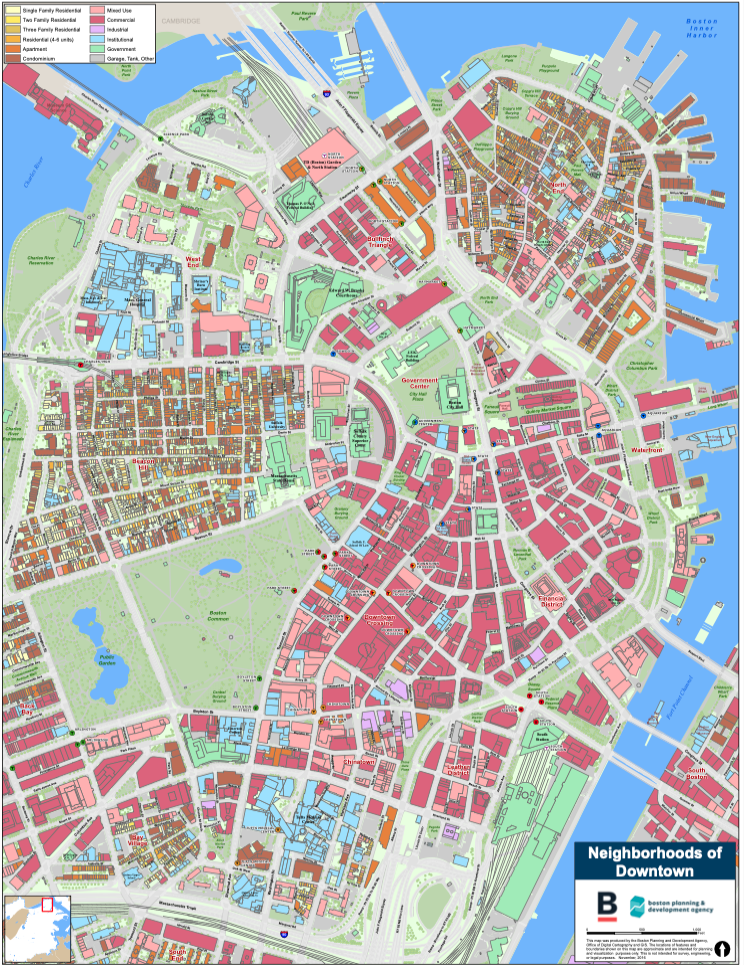

Neighbourhoods of Boston Downtown, from https://www.bostonplans.org/getattachment/f93219c1-39bc-4d29-87ea-225f4873c429/

In [ ]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Let's download the dataset from the UCI machine learning repository:

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases' '/housing/housing.data', sep='\s+', names = names) 

In [ ]:
df

# Plotting Some important values

The pairplot function in the Seaborn library is a useful data visualization tool that helps to plot pairwise relationships between multiple variables in a dataset. It creates a grid of scatterplots and histograms showing the relationship between each pair of variables in the dataset.

For example, if you have a dataset with multiple columns, the pairplot function can help you to quickly visualize the relationship between each column. The scatterplots in the diagonal of the grid show the distribution of each variable, while the scatterplots in the off-diagonal show the relationship between two variables.

This function can be helpful in identifying patterns and correlations between variables, and can be used to gain insights into the relationships between different features of your data. Overall, the pairplot function is a useful tool for exploratory data analysis and can help to quickly identify potential areas of interest for further investigation.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['DIS', 'RAD', 'NOX']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

We can observe, for instance, that the closer to the Boston working centres, the highest the concentration of Nox particles.

# Exercise 

Can you tell how crime per capita by town is related to the houses median values rate using pair plots as above? What is your conclusion?

In [ ]:
cols = ['CRIM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

# How features are related?


If you have two sets of data and you want to know if they are related in some way, the numpy corrcoef function can help you to quantify that relationship. It returns a correlation matrix that shows the correlation coefficients between each pair of variables.

The correlation coefficient is a value between -1 and 1 that indicates the strength and direction of the relationship between two variables. A value of 1 indicates a perfect positive correlation, which means that as one variable increases, the other variable also increases. A value of -1 indicates a perfect negative correlation, which means that as one variable increases, the other variable decreases. A value of 0 indicates no correlation between the variables.

The numpy corrcoef function can be helpful in many different contexts, including scientific research, finance, and machine learning. It is a useful tool for understanding the relationship between different variables and can help to identify potential areas of interest for further investigation.

The Seaborn Heatmap function is a data visualization tool that can help you understand the relationship between two variables. It works by taking in a two-dimensional array, where each element represents a value for a specific pair of variables.

The function then creates a color-coded grid that displays the value of each element in the array. The color of each square in the grid is determined by the value of the corresponding element in the array, with higher values typically represented by brighter colors.

The Seaborn Heatmap function is particularly useful for identifying patterns and correlations between variables, as it allows you to quickly see which pairs of variables have a strong relationship. It can be used to explore complex datasets and can help to identify potential areas of interest for further analysis.

Overall, the Seaborn Heatmap function is a powerful tool for visualizing complex data and can be used to gain insights into the relationships between different variables in a dataset.

In [ ]:
import numpy as np

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()

plt.show()

By observing the last row of the plot, we remark that all features except RM, the average number of rooms, are negatively correlated with the median house price for a given neighbourhood.

# Regression

Regression is a statistical method that helps us to analyze and understand the relationship between two or more variables. It is commonly used to predict or estimate one variable based on the values of other variables.

For example, if we want to understand how the price of a house is related to factors such as its size, location, number of bedrooms, and age, we can use regression to build a model that predicts the price of a house based on these factors.

In this context, regression would be appropriate to predict house prices from historical data because there is likely a relationship between the price of a house and its various attributes, such as location, size, and number of bedrooms. By analyzing historical data on house prices and their attributes, we can build a model that helps us to predict the price of a house with a certain level of accuracy.

This can be useful for various purposes, such as helping homebuyers to make informed decisions about which houses to purchase, or helping real estate agents to price houses correctly based on their attributes. Additionally, banks and lenders may use regression to estimate the value of a house for the purpose of determining how much they are willing to lend to a borrower.

Overall, regression is a powerful tool for understanding the relationships between variables and making predictions based on historical data.

## Linear regression

Linear regression is a statistical method used to analyze the relationship between two continuous variables. Here are the criteria to apply linear regression with success:

- Linearity: There should be a linear relationship between the dependent variable (y) and independent variable (x). This means that a straight line should be able to adequately describe the relationship between the two variables.

- Independence: Observations should be independent of each other. In other words, the value of the dependent variable for one observation should not depend on the value of the dependent variable for another observation.

- Homoscedasticity: The variance of the residuals should be constant across all values of the independent variable. This means that the spread of the residuals should be similar for all values of x.

- Normality: The residuals should be normally distributed. This means that the distribution of the residuals should be bell-shaped, with most of the residuals close to zero and fewer residuals farther away from zero.

- Outliers: There should be no outliers or influential data points that could significantly affect the results of the analysis.

If these criteria are met, linear regression can be applied with success to model the relationship between two variables. It is important to note that linear regression is a powerful tool, but it has limitations and assumptions that must be carefully considered before applying it to any data

## Training the model: reducing the loss iteractively


The code block below represents an implementation of a linear regression model using stochastic gradient descent (SGD) algorithm. The class LinearRegressionGD has three methods: init, fit, net_input, and predict.

The __init__ method initializes the learning rate eta and the number of iterations n_iter. The default values are eta=0.001 and n_iter=20.

The fit method trains the model by updating the weights based on the error between the predicted output and the actual output. The weights w_ are initialized as zeros plus an additional element for the bias term. The method iterates over the training data X for n_iter times. In each iteration, it computes the predicted output using self.net_input(X) method, calculates the error between predicted and actual output, and updates the weights using the gradient descent rule. The bias term is updated separately. Finally, the method stores the cost or mean squared error in the cost_ list for each iteration.

The net_input method computes the dot product between the input features X and the weight coefficients w_. It returns the predicted output.

The predict method is a helper method that uses the net_input method to return the predicted output.

Overall, the LinearRegressionGD class implements a simple linear regression model using SGD algorithm for updating the weights in a batch mode.

In [ ]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

For an elementary model we use a single feature, RM, the average number of rooms, in this case.

In [ ]:
X = df[['RM']].values
y = df['MEDV'].values

Scaling features is an important step in machine learning because it can help improve the performance and stability of many algorithms. Feature scaling ensures that all features have the same range, which can prevent certain features from dominating others, especially in algorithms that are sensitive to feature magnitudes. Furthermore, feature scaling can help the optimization algorithm converge faster and produce better results.

StandardScaler in scikit-learn is a popular method to scale features. It scales the features such that they have a mean of 0 and a variance of 1. This method subtracts the mean from each feature and divides by the standard deviation, which is calculated using the formula (x - mean) / std. This transformation ensures that each feature has a similar scale, which is essential for many machine learning algorithms, especially those that rely on distances or gradients, such as K-nearest neighbors or support vector machines.

In [ ]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [ ]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

Here we plot the model's loss, that is, the sum of squared error acroos the training iterations:

In [ ]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

The sum of squared errors is a commonly used loss function in regression problems because it helps us to measure how well our model is able to predict the outcome of interest (such as house prices).

When we use a regression model to predict house prices, we typically calculate the difference between the predicted price and the actual price for each house in our dataset. The sum of squared errors is simply the sum of the squares of these differences.

This loss function is appropriate for regression problems because it penalizes larger errors more heavily than smaller errors. This is important because we want our model to be more accurate for larger errors, since these are likely to have a bigger impact on our predictions.

In addition, the sum of squared errors is a continuous and differentiable function, which makes it easier to optimize using numerical methods. This means that we can use various optimization techniques to find the parameters of our model that minimize the sum of squared errors, and thus improve the accuracy of our predictions.

The function below plots the model's predictions in black while the actual values are plotted in steelblue

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

# Exercise

Looking at the plot above, can we tell our variable (RM) satisfies the criteria for applying linear regression model? 

## Predicting the house prices
For a neighbourhood where the average number of rooms is 4: 

In [ ]:
num_rooms_std = sc_x.transform(np.array([[4.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std.reshape(-1,1)))

# Visualizing model performance

In the code block, the 'residual' is the difference between the predicted values (y_pred) and the actual target values (y_std), which are the values on the y-axis.

The plot shows a scatter plot of the residuals against the predicted values on the x-axis. The residuals are calculated as the difference between the predicted values and the actual target values.

The plot is useful for analyzing the performance of a regression model because it helps to identify any patterns or trends in the differences between the predicted and actual values. If the plot shows a random distribution of points around the horizontal line at y=0, then the model is likely making good predictions. However, if there is a pattern in the plot (such as a curve or a slope), it suggests that the model may be making systematic errors or biases in its predictions.

In [ ]:
y_pred = lr.predict(X_std)

In [ ]:
plt.scatter(y_std,  y_pred - y_std,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()


plt.show()

# Exercsise: 
What is the median price of a 2-bedroom appartment according to this model? Is it reasonalble?

# Evaluating the model
The Rˆ2 score (also called the coefficient of determination) is an important measure of how well a regression model fits the data. It is a number between 0 and 1 that represents the proportion of the variance in the target variable (the variable being predicted) that is explained by the model.

In simpler terms, the Rˆ2 score tells us how much of the variation in the target variable can be explained by the independent variables (the variables used to make predictions). A high Rˆ2 score (close to 1) means that the model is able to explain a large proportion of the variation in the target variable, while a low Rˆ2 score (close to 0) means that the model is not able to explain much of the variation.

The Rˆ2 score is important because it helps us to evaluate the performance of a regression model. A high Rˆ2 score indicates that the model is making accurate predictions, while a low Rˆ2 score suggests that the model needs to be improved or that there may be problems with the data. Additionally, the Rˆ2 score can be used to compare the performance of different models and to choose the best one for a particular task.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f' % (
        mean_squared_error(y_std, y_pred),
        ))
print('R^2 train: %.3f' % (
        r2_score(y_std, y_pred),
        ))

# Building a more robust model

First, create a separate test set.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [ ]:
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

We can see a way more random distrubution of points, showing that our linear model now preforms way better than before

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()


plt.show()

We can now evaluate how our model performs on training and on (unseen) test data, by looking at the loss and at the R2 Score.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# Exercise

Your manager for the Boston Dcom Real State Agency is not really impressed by your current predictions. 
Find in the Sklearn library more advanced regression methods and try to get the the Rˆ2 test score above 0.8 

# Submit your results 

Use the holdout test set here: https://github.wdf.sap.corp/gist/i061767/84a0873c6d210559dc7a51b31d20ef6b#file-holdout_test_set-csv 

Predict the house prices and submit your CSV file to the instructor. The participant who obtains the smallest loss on the holdout test data wins the prize.

In [ ]:
test_set = pd.read_csv('holdout_test_set.csv') 

In [ ]:
test_set

In [ ]:
preds = slr.predict(test_set)

print(preds)

The true house prices for the holdout test dataset are given below. It will allow to verify your best model performance on unseen data.  For that we will use the MSE (Mean Squared Error) function :

In [ ]:
 true_prices = [25.8575674603186,21.63133422137115,19.992953507209844,33.25343901845637,16.507269659091364,22.09890536317405,15.212214714775008,12.057754748023314,10.201730401257976,23.80510657054825,24.00248271480743,16.910467295437233,22.13971210398425,21.68228669734984,20.439146042947947,11.732277261707702,15.58425000985411,21.450441605248876,22.49857504793045,18.264558581808085,17.100852526974418,16.748532095992772,20.683827633110678,14.412078014818418,20.74339191544604,14.505453906303366]

In [ ]:
 mean_squared_error(preds, true_prices)

 # Submit your results 🏁 


Enter the R2 score and the MSE loss above to the leaderboard: https://sap-my.sharepoint.com/:l:/p/anderson_santana_de_oliveira/FLIQ2iJMYj1CkQFq2hp-X7oBFOQEq8K9muLJd70zxPWYjg?e=9yVopg 